In [1]:
#Data preprocessing
##Load Data
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("student_scores[1].csv")

In [3]:
data = data[['Hours', 'Scores']].values

In [4]:
##Split Data:Train data,Test Data
train_len = 20
train_idxs = np.random.choice(len(data), train_len, replace=False)

In [5]:
train_idxs

array([ 0,  6, 12,  8, 16, 13, 23, 10,  5, 11,  7,  9, 21, 18,  4,  3, 15,
        1, 14, 22])

In [6]:
train_data = data[train_idxs]

In [7]:
train_data

array([[ 2.5, 21. ],
       [ 9.2, 88. ],
       [ 4.5, 41. ],
       [ 8.3, 81. ],
       [ 2.5, 30. ],
       [ 3.3, 42. ],
       [ 6.9, 76. ],
       [ 7.7, 85. ],
       [ 1.5, 20. ],
       [ 5.9, 62. ],
       [ 5.5, 60. ],
       [ 2.7, 25. ],
       [ 4.8, 54. ],
       [ 6.1, 67. ],
       [ 3.5, 30. ],
       [ 8.5, 75. ],
       [ 8.9, 95. ],
       [ 5.1, 47. ],
       [ 1.1, 17. ],
       [ 3.8, 35. ]])

In [8]:
test_idxs = [idx for idx in range(len(data)) if idx not in train_idxs]

In [9]:
test_idxs

[2, 17, 19, 20, 24]

In [10]:
test_data = data[test_idxs]

In [11]:
test_data

array([[ 3.2, 27. ],
       [ 1.9, 24. ],
       [ 7.4, 69. ],
       [ 2.7, 30. ],
       [ 7.8, 86. ]])

In [12]:
#Model Construction
##Linear Regression
from sklearn.linear_model import LinearRegression

In [13]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

In [14]:
##DecisionTree
from sklearn.tree import DecisionTreeRegressor

In [15]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=2,
                                 random_state=0)

In [16]:
##Set Loss Function
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

In [37]:
#Split Data:Train data,Validation data
train_len = 20
train_idxs = np.random.choice(len(train_data), train_len, replace=False)

In [18]:
val_idxs = [idx for idx in range(len(train_data)) if idx not in train_idxs]

In [19]:
val_data = train_data[val_idxs]

In [20]:
train_data = train_data[train_idxs]

In [21]:
##Train and Validte
models = [model_lr, model_dt]

In [28]:
##Train
x = train_data[:, 0:1]
y = train_data[:, 1]

print(x.shape, y.shape)

(20, 1) (20,)


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
##Input data files are available in the read-only "../input/" directory
##For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [32]:
##Using pandas to read the dataset + checking whether it displays correctly 
df = pd.read_csv("student_scores[1].csv")
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [43]:
print(y_pred)
print('________________________')
print(y_train)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]
________________________
9     25
13    42
1     47
22    35
5     20
2     27
12    41
15    95
3     75
4     30
20    30
17    24
21    54
18    67
24    86
7     60
10    85
14    17
19    69
6     88
Name: Scores, dtype: int64


In [40]:
print(y_pred)
print('________________________')
print(y_test)

[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]
________________________
8     81
16    30
0     21
23    76
11    62
Name: Scores, dtype: int64


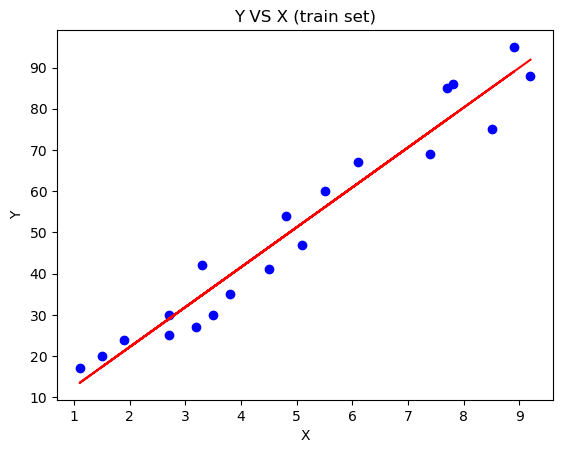

In [41]:
#Plot for Training dataset
plt.scatter(x_train, y_train, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Y VS X (train set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

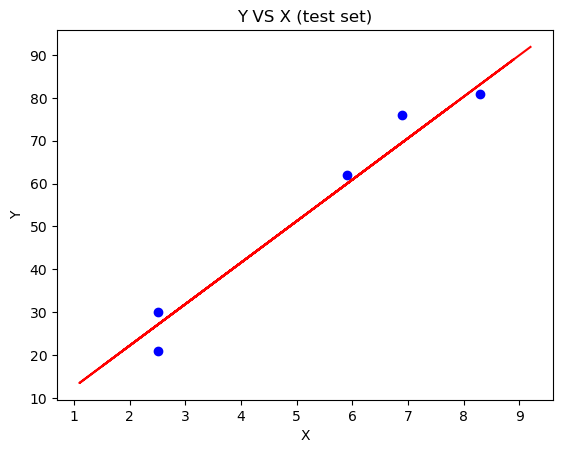

In [42]:
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_train, model.predict(x_train), color='red')
plt.title('Y VS X (test set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()